# RELATÓRIO DE ANÁLISE — Adult Census Income Dataset (Kaggle)

## 1. 🔍 Desafio de Negócio no Setor Financeiro

Instituições financeiras buscam, continuamente, maximizar a **Taxa de Conversão (Conversion Rate)** em suas ofertas de produtos e a **Retenção de Clientes de Alto Valor**.

O processo de qualificação e segmentação de clientes é ponto crítico para bons resultados e eventuais falhas podem resultar em:

* **Oferta Ineficiente:** Direcionamento de produtos inadequados ou genéricos, desperdiçando recursos de marketing e relacionamento.
* **Perda de Oportunidade:** Falha em identificar rapidamente clientes com alto potencial de renda e, por consequência, com maior capacidade de investimento em produtos *premium* ou exclusivos.

---

## 2. 💡 Proposta e Objetivo

O presente estudo propõe a utilização do **Machine Learning (ML)** aplicado a dados socioeconômicos (simulados pelo *Adult Census Income Dataset*) para criar uma **ferramenta preditiva** de classificação de clientes.

### Objetivo Central

Construir um **Modelo de Classificação Binária** capaz de prever, com alta acurácia, quais clientes pertencem ao segmento de **Alta Renda** (renda anual simulada **acima de $50.000**), com base em variáveis de perfil (idade, educação, ocupação, etc.).

### Hipótese Central

Variáveis demográficas e de emprego coletadas no "Questionário de Perfil" do cliente possuem **padrões estatisticamente significativos** que diferenciam os clientes de alta renda, e o ML é a ferramenta ideal para capturar essa não-linearidade.

---

## 3. 📈 Impacto Estratégico e Valor Agregado

A implantação de um modelo preditivo como este em ambiente de produção oferece vantagens estratégicas imediatas:

* **Otimização de *Cross-Selling***: Permite que a área comercial direcione de forma **proativa e personalizada** a oferta de **Fundos de Investimento Exclusivos, Previdência Privada e *Wealth Management*** apenas para o grupo de clientes com maior probabilidade de conversão.
* **Melhoria do *Customer Experience***: Reduz a frustração do cliente ao garantir que as recomendações de investimento sejam altamente **relevantes e alinhadas** com seu potencial financeiro.
* **Base para *Credit Scoring***: A técnica de modelagem de classificação e a análise das **variáveis preditivas mais importantes** (*feature importance*) fornecem *insights* valiosos que podem ser estendidos para outros modelos críticos do banco, como risco de crédito e detecção de fraude.

**Em suma:** Este projeto demonstra a capacidade de transformar dados estáticos de questionário em **inteligência de negócios acionável**, posicionando a instituição na vanguarda da **tomada de decisão orientada por dados** no mercado financeiro.

## 4. 📋 Seleção do Conjunto de Dados (Dataset)

Dataset: Adult Census Income. https://www.kaggle.com/datasets/priyamchoksi/adult-census-income-dataset

Conteúdo: Dados extraídos do banco de dados do Censo de 1994 realizado nos Estados Unidos.

Tarefa: Verificar se uma pessoa ganha mais de $ 50.000 por ano.

Tipo de Atividade: Classificatória

Target: "income" (renda)

#### Descrição dos Dados

| Feature            | Descrição                                                                                 |
| ------------------ | ----------------------------------------------------------------------------------------- |
| **age**            | Idade do indivíduo (em anos).                                                             |
| **workclass**      | Tipo de vínculo empregatício (ex.: Private, Federal-gov).                                 |
| **fnlwgt**         | Peso amostral do censo (*final weight*), indicando quantas pessoas o registro representa. |
| **education**      | Nível de escolaridade concluído.                                                          |
| **education.num**  | Escolaridade convertida para um valor numérico.                                           |
| **marital.status** | Estado civil do indivíduo (ex.: Married-civ-spouse, Divorced).                            |
| **occupation**     | Profissão exercida pelo indivíduo.                                                        |
| **relationship**   | Relação familiar na residência (ex.: Husband, Not-in-family).                             |
| **race**           | Raça/etnia declarada.                                                                     |
| **sex**            | Sexo informado.                                                                           |
| **capital.gain**   | Ganho anual de capital (ex.: investimentos).                                              |
| **capital.loss**   | Perda anual de capital.                                                                   |
| **hours.per.week** | Número de horas trabalhadas por semana.                                                   |
| **native.country** | País de origem do indivíduo.                                                              |
| **income**         | Target: indica se a renda anual é `<=50K` ou `>50K`.                                      |


#### Feature: `fnlwgt`

Peso amostral do censo. Cada registro representa múltiplas pessoas. 
Não usado em ML (não descreve o indivíduo, apenas representatividade amostral).

🎯 A pesquisa procura responder: **quais variáveis do perfil de investidor mais influenciam a classificação de clientes como alta renda e como essas informações podem ser utilizadas para otimizar a estratégia de oferta de fundos de investimento?**

## 5. 🛠️ Metodologia e Etapas do Projeto

O projeto seguirá o fluxo de trabalho clássico de Machine Learning (ML), dividido nas seguintes etapas principais:

### Pré-processamento e Análise Exploratória de Dados (EDA)

* **Tratamento de Missing Values**
* **Codificação de Variáveis Categóricas** (*Encoding*)
* **Normalização/Escalonamento**
* **Análise Exploratória (EDA)**

---

### Modelagem Preditiva

* **Divisão dos Dados** (Treino e Teste)
* **Seleção de Algoritmos** (e.g., Regressão Logística, Random Forest, GBM)
* **Otimização de Hiperparâmetros** (*Hyperparameter Tuning*)

---

### Avaliação de Desempenho

* **Cálculo de Métricas:** Acurácia, Precisão, Recall e F1-Score.
* **Análise da Curva ROC e AUC** (*Area Under the Curve*).

---

### Interpretabilidade do Modelo

* Identificação das **Variáveis Mais Importantes** (*Feature Importance*).

### Pré-processamento / Análise Exploratória / Engenharia de Features

In [1]:
# Importação de bibliotecas essenciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
# Carregamento do conjunto de dados

df = pd.read_csv("adult_census_income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Análise inicial dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Verificação de estatísticas descritivas
# considerando apenas colunas numéricas

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Contagem de ocorrências de '?' (valores faltantes codificados)
q_counts = {col: (df[col] == '?').sum() for col in df.columns if df[col].dtype == 'object'}
if q_counts:
    print("\nOcorrências de '?' por coluna (se houver):")
    for k, v in q_counts.items():
        print(f"  {k}: {v}")


Ocorrências de '?' por coluna (se houver):
  workclass: 1836
  education: 0
  marital.status: 0
  occupation: 1843
  relationship: 0
  race: 0
  sex: 0
  native.country: 583
  income: 0


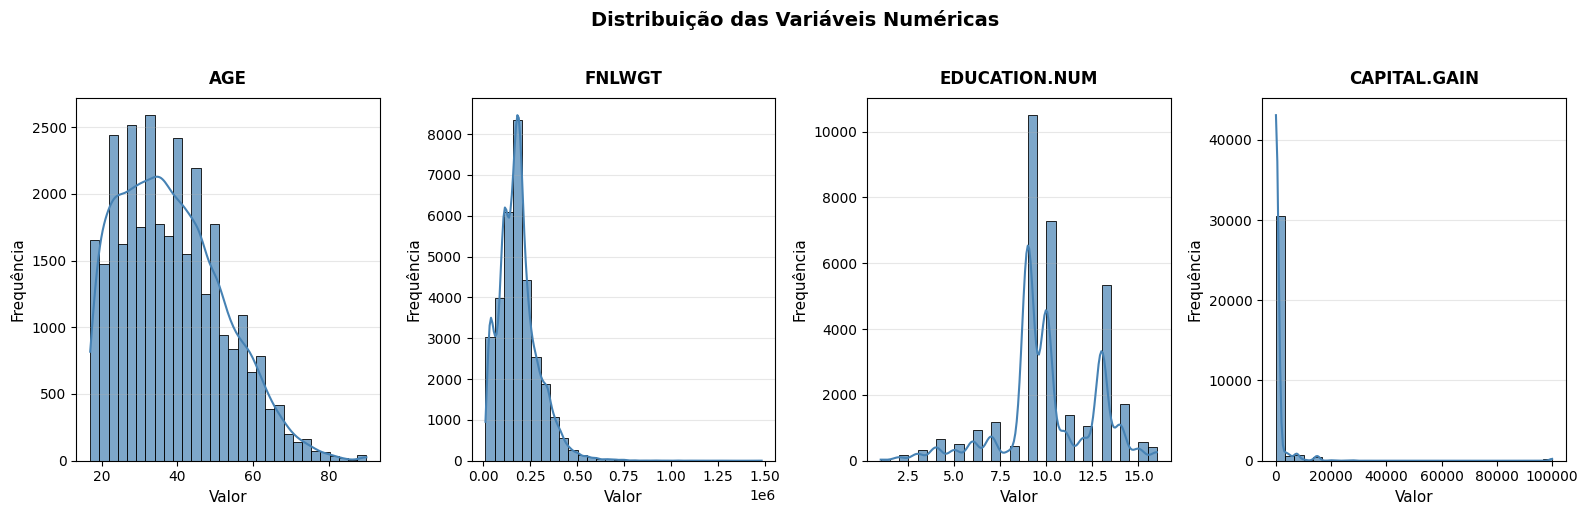

In [6]:
# Distribuições das variáveis numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    # Determinar quantas colunas mostrar (máximo 4)
    cols_to_plot = num_cols[:min(4, len(num_cols))]
    n_cols = len(cols_to_plot)
    
    fig, axes = plt.subplots(1, n_cols, figsize=(16, 5))
    
    # Se houver apenas 1 coluna, axes não será um array
    if n_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_to_plot):
        sns.histplot(df[col].dropna(), kde=True, ax=ax, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'{col.upper()}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Valor', fontsize=11)
        ax.set_ylabel('Frequência', fontsize=11)
        ax.grid(axis='y', alpha=0.3)
    
    plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

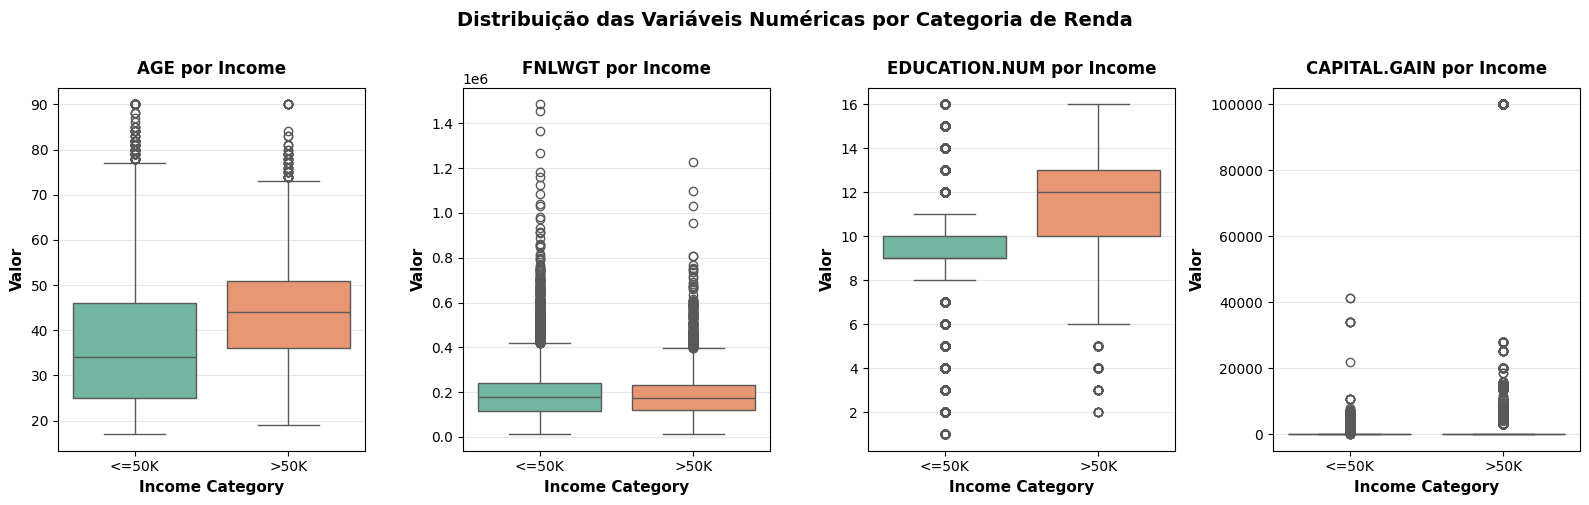

In [7]:
# Boxplots das numéricas por target
if 'income' in df.columns and num_cols:
    cols_to_plot = num_cols[:min(4, len(num_cols))]
    n_cols = len(cols_to_plot)
    
    fig, axes = plt.subplots(1, n_cols, figsize=(16, 5))
    
    # Se houver apenas 1 coluna, axes não será um array
    if n_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_to_plot):
        sns.boxplot(x='income', y=col, data=df, hue='income', ax=ax, palette='Set2', legend=False)
        ax.set_title(f'{col.upper()} por Income', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Income Category', fontsize=11, fontweight='bold')
        ax.set_ylabel('Valor', fontsize=11, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
    
    plt.suptitle('Distribuição das Variáveis Numéricas por Categoria de Renda', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

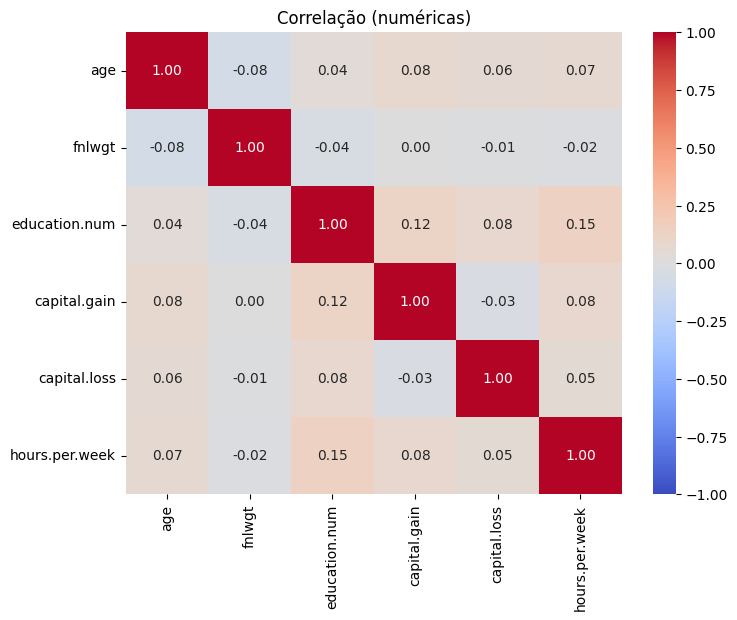

In [8]:
# Correlação entre numéricas
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlação (numéricas)')
    plt.show()

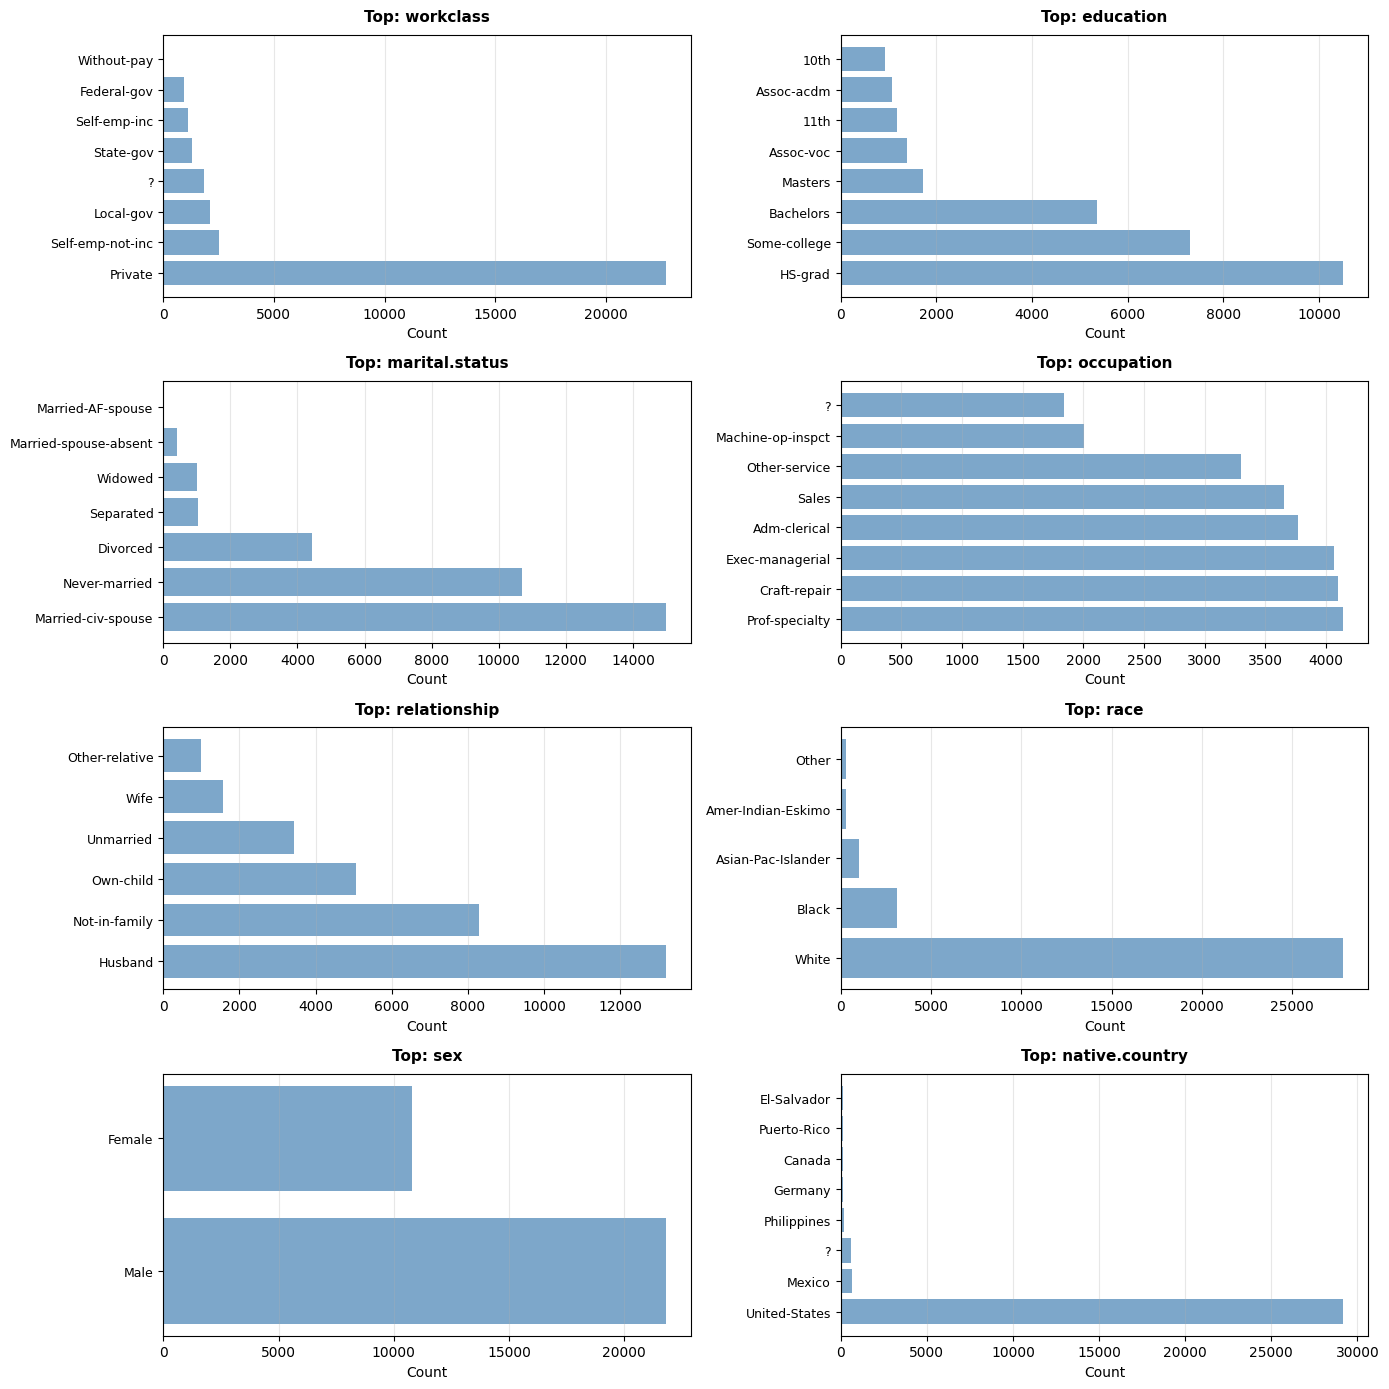

In [9]:
# Top categorias para variáveis categóricas chave
fig, axes = plt.subplots(4, 2, figsize=(14, 14))  # Aumentar altura
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country']

for ax, col in zip(axes.flat, cat_cols):
    if col in df.columns:
        top = df[col].value_counts().head(8)
        ax.barh(top.index, top.values, color='steelblue', alpha=0.7)
        ax.set_title(f'Top: {col}', fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel('Count', fontsize=10)
        ax.tick_params(axis='y', labelsize=9)  # Reduzir tamanho dos labels do eixo Y
        ax.grid(axis='x', alpha=0.3)  # Adicionar grid para melhor legibilidade

plt.tight_layout()  # ESSENCIAL - ajusta espaçamento automático
plt.show()

Target counts:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Target percent:
 income
<=50K    75.92
>50K     24.08
Name: proportion, dtype: float64


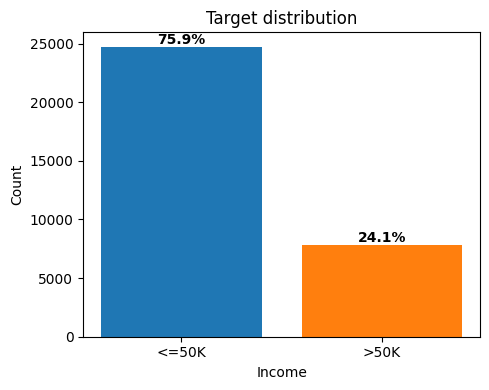

In [10]:
# Balanceamento da target
if 'income' in df.columns:
    counts = df['income'].value_counts()
    pct = df['income'].value_counts(normalize=True) * 100
    print("Target counts:\n", counts)
    print("\nTarget percent:\n", pct.round(2))
    
    fig, ax = plt.subplots(figsize=(5, 4))
    bars = ax.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e'])
    
    # Adicionar rótulos percentuais no topo de cada coluna
    for i, (bar, percentage) in enumerate(zip(bars, pct.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_title('Target distribution')
    ax.set_ylabel('Count')
    ax.set_xlabel('Income')
    plt.tight_layout()
    plt.show()


Top rates of >50K by workclass (top 10):
workclass
Self-emp-inc        0.557
Federal-gov         0.386
Local-gov           0.295
Self-emp-not-inc    0.285
State-gov           0.272
Private             0.219
?                   0.104
Never-worked        0.000
Without-pay         0.000
Name: income, dtype: float64


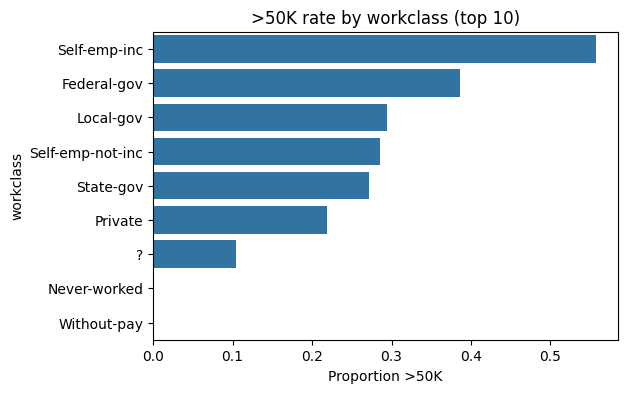


Top rates of >50K by occupation (top 10):
occupation
Exec-managerial      0.484
Prof-specialty       0.449
Protective-serv      0.325
Tech-support         0.305
Sales                0.269
Craft-repair         0.227
Transport-moving     0.200
Adm-clerical         0.134
Machine-op-inspct    0.125
Farming-fishing      0.116
Name: income, dtype: float64


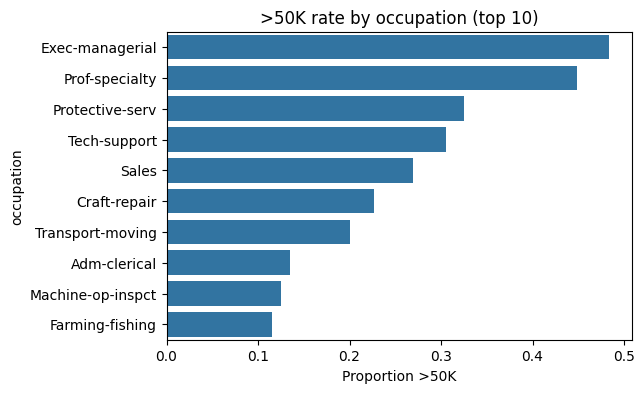


Top rates of >50K by marital.status (top 10):
marital.status
Married-civ-spouse       0.447
Married-AF-spouse        0.435
Divorced                 0.104
Widowed                  0.086
Married-spouse-absent    0.081
Separated                0.064
Never-married            0.046
Name: income, dtype: float64


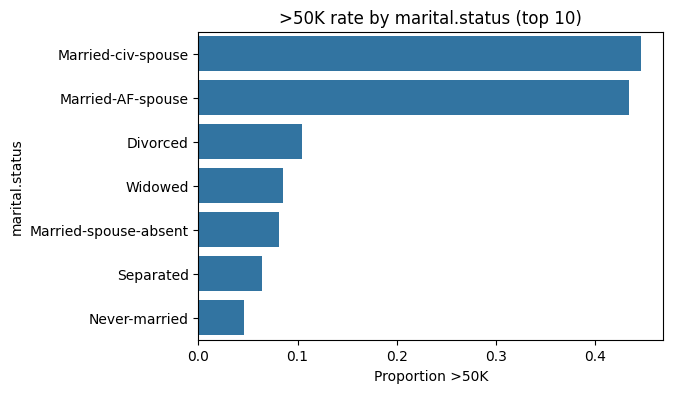


Top rates of >50K by education (top 10):
education
Doctorate       0.741
Prof-school     0.734
Masters         0.557
Bachelors       0.415
Assoc-voc       0.261
Assoc-acdm      0.248
Some-college    0.190
HS-grad         0.160
12th            0.076
10th            0.066
Name: income, dtype: float64


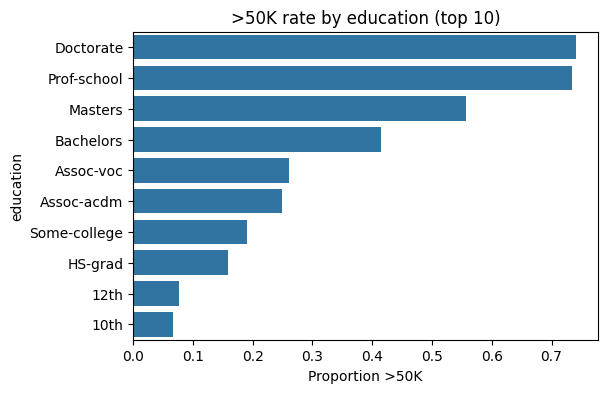

In [11]:
# Taxa de >50K por categorias-chave (top categories)
cat_check = ['workclass','occupation','marital.status','education']
for c in cat_check:
    if c in df.columns:
        rate = df.groupby(c)['income'].apply(lambda x: (x=='>50K').mean()).sort_values(ascending=False).head(10)
        print(f"\nTop rates of >50K by {c} (top 10):")
        print(rate.round(3))
        plt.figure(figsize=(6,4))
        sns.barplot(x=rate.values, y=rate.index)
        plt.xlabel('Proportion >50K')
        plt.title(f'>50K rate by {c} (top 10)')
        plt.show()

In [12]:
# VIF rápido nas numéricas (ajuda decidir remoções)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    X_num = df[num_cols].dropna()
    X_num_const = sm.add_constant(X_num)
    vif_data = pd.DataFrame({
        'feature': X_num.columns,
        'VIF': [variance_inflation_factor(X_num_const.values, i+1) for i in range(len(X_num.columns))]
    }).sort_values('VIF', ascending=False)
    print("\nVIF (numéricas):\n", vif_data.round(2))


VIF (numéricas):
           feature   VIF
2   education.num  1.04
5  hours.per.week  1.03
3    capital.gain  1.03
0             age  1.02
4    capital.loss  1.01
1          fnlwgt  1.01


In [13]:
# Salvar um snapshot rápido do raw data
df.to_csv('adult_raw_snapshot.csv', index=False)

Criação de cópia do dataframe para iniciar o tratamento de limpeza e transformação dos dados

In [14]:
# Criar cópia para não alterar o df original
df_clean = df.copy()

# Identificar colunas numéricas e categóricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# --- Tratamento de valores nulos ---
# Registrar contagem de nulos antes
nulos_antes = df_clean.isnull().sum()
print("Nulos antes (colunas com >0):")
print(nulos_antes[nulos_antes > 0])


Nulos antes (colunas com >0):
Series([], dtype: int64)


In [15]:
df_clean.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
# Tratamento de valores ausentes (representados por "?")

# Identificar colunas com "?"
columns_with_missing = df_clean.columns[df_clean.isin(['?']).any()].tolist()
print("Colunas com valores ausentes ('?'):", columns_with_missing)

# Contar valores ausentes por coluna
for col in columns_with_missing:
    count = (df_clean[col] == '?').sum()
    percentage = (count / len(df_clean)) * 100
    print(f"{col}: {count} valores ausentes ({percentage:.2f}%)")

# Substituir "?" pela string "outros" mantendo as linhas
df_clean[columns_with_missing] = df_clean[columns_with_missing].replace('?', 'outros')
print(f"\nSubstituídos '?' por 'outros' nas colunas: {columns_with_missing}")

Colunas com valores ausentes ('?'): ['workclass', 'occupation', 'native.country']
workclass: 1836 valores ausentes (5.64%)
occupation: 1843 valores ausentes (5.66%)
native.country: 583 valores ausentes (1.79%)

Substituídos '?' por 'outros' nas colunas: ['workclass', 'occupation', 'native.country']


In [17]:
df_clean

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,outros,77053,HS-grad,9,Widowed,outros,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,outros,186061,Some-college,10,Widowed,outros,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
df_clean['race'].value_counts(normalize=True)

race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64

In [19]:
df_clean['native.country'].value_counts(normalize=True)

native.country
United-States                 0.895857
Mexico                        0.019748
outros                        0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua 

Com o conteúdo já observado, verificamos que a coluna **'fnlwgt'** não agrega valor analítico ao nosso estudo, 
uma vez que representa o peso final da amostra e não uma característica demográfica relevante.

Também verificamos que as colunas de **nacionalidade** ('native.country) e **raça** ('race') possuem uma predominância significativa de um único valor,
o que pode enviesar nossas análises futuras.

Assim, decidimos **remover essas três colunas do conjunto de dados** para melhorar a qualidade da análise.

In [20]:
df_clean = df_clean.drop(columns=['fnlwgt','race','native.country'])
df_clean.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,outros,HS-grad,9,Widowed,outros,Not-in-family,Female,0,4356,40,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,<=50K
2,66,outros,Some-college,10,Widowed,outros,Unmarried,Female,0,4356,40,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,<=50K


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [22]:
# Identificação de colunas numéricas e categóricas após remoção de features

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colunas Numéricas:")
print(numeric_cols)
print(f"\nTotal: {len(numeric_cols)} colunas numéricas\n")

print("Colunas Categóricas:")
print(categorical_cols)
print(f"\nTotal: {len(categorical_cols)} colunas categóricas")

Colunas Numéricas:
['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Total: 5 colunas numéricas

Colunas Categóricas:
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'income']

Total: 7 colunas categóricas


In [23]:
df_clean.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [24]:
print(df_clean.isnull().sum())

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64


In [25]:
print(df_clean['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
outros               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [26]:
print(df_clean['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
outros               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [27]:
# O termo 'outros' foi utilizado para substituir valores ausentes em colunas categóricas, como 'workclass' e 'occupation', facilitando a análise sem perder dados.
# Porém, ao verificar os demais valores nas colunas, 'outros' pode levar a confusão, pois pode ser interpretado como uma categoria legítima.
# Portanto, vamos alterá-lo para 'desconhecido', visando indicar melhor o significado do termo usado no preenchimento dos valores ausentes.

# Substituir "outros" pela string "desconhecido" mantendo as linhas
df_clean[['workclass','occupation']] = df_clean[['workclass','occupation']].replace('outros', 'desconhecido')
print(f"\nSubstituídos 'outros' por 'desconhecido' nas colunas: {['workclass','occupation']}")


Substituídos 'outros' por 'desconhecido' nas colunas: ['workclass', 'occupation']


In [28]:
print(df_clean['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
desconhecido         1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [29]:
print(df_clean['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
desconhecido         1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [30]:
for col in df_clean.select_dtypes(include=['object']).columns:
    print(f"Coluna: {col}")
    print(df_clean[col].unique())
    print("-" * 20)

Coluna: workclass
['desconhecido' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']
--------------------
Coluna: education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
--------------------
Coluna: marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
--------------------
Coluna: occupation
['desconhecido' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------------------
Coluna: relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
--------------------
Coluna: sex
['Female' 'Male']
--------------------


Considerando que os dados estão limpos, vamos à transformação dos valores

A coluna 'education' possui níveis de educação que podem ser ordenados e já estão presentes na coluna 'education.num', que é numérica.
Portanto, podemos remover a coluna 'education' para evitar redundância.

In [31]:
df_clean = df_clean.drop(columns=['education'])
df_clean.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,desconhecido,9,Widowed,desconhecido,Not-in-family,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,<=50K
2,66,desconhecido,10,Widowed,desconhecido,Unmarried,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,<=50K


In [32]:
# Vamos substituir as colunas 'capital.gain' e 'capital.loss' por uma única coluna 'capital.result.num', que representa o ganho ou perda líquida de capital.

# Cria a nova feature subtraindo a perda do ganho
df_clean['capital.result.num'] = df_clean['capital.gain'] - df_clean['capital.loss']

# Remove as colunas originais
df_clean.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)

In [33]:
df_clean

,age,workclass,education.num,marital.status,occupation,relationship,sex,hours.per.week,income,capital.result.num
0,90,desconhecido,9,Widowed,desconhecido,Not-in-family,Female,40,<=50K,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,18,<=50K,-4356
2,66,desconhecido,10,Widowed,desconhecido,Unmarried,Female,40,<=50K,-4356
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,40,<=50K,-3900
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,40,<=50K,-3900
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,Male,40,<=50K,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,38,<=50K,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,>50K,0
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,40,<=50K,0


In [34]:
# Vamos transformar a variável alvo 'income' para conter 0 e 1.

# Mapeamento explícito para a variável income
df_clean['income.num'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})

# Remove a coluna original 'income'
df_clean.drop('income', axis=1, inplace=True)

In [35]:
df_clean.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,hours.per.week,capital.result.num,income.num
0,90,desconhecido,9,Widowed,desconhecido,Not-in-family,Female,40,-4356,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,18,-4356,0
2,66,desconhecido,10,Widowed,desconhecido,Unmarried,Female,40,-4356,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,40,-3900,0
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,40,-3900,0


In [36]:
# Mapeamento explícito para a variável sex
df_clean['sex.num'] = df_clean['sex'].map({'Female': 0, 'Male': 1})

# Remove a coluna original 'sex'
df_clean.drop('sex', axis=1, inplace=True)

In [37]:
# Lista de colunas categóricas restantes
categorical_cols = ['workclass', 'marital.status', 'occupation', 'relationship']

# Aplica One-Hot Encoding
# drop_first=True evita multicolinearidade ao descartar a primeira categoria de cada feature
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [38]:
df_clean.head()

,age,education.num,hours.per.week,capital.result.num,income.num,sex.num,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_desconhecido,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,90,9,40,-4356,0,0,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,82,9,18,-4356,0,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,66,10,40,-4356,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,54,4,40,-3900,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,41,10,40,-3900,0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Vamos à etapa de escalonamento dos dados numéricos.

In [39]:
# 1. Identificar as colunas numéricas que precisam de escalonamento (não binárias)
numerical_cols = ['age', 'education.num', 'hours.per.week', 'capital.result.num']

# 2. Inicializar o Scaler
scaler = StandardScaler()

# 3. Aplicar o Scaler apenas nas colunas selecionadas
# O método fit_transform calcula a média e o desvio padrão e transforma os dados
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

print("Dados numéricos escalonados:")
print(df_clean[numerical_cols].head())

Dados numéricos escalonados:
        age  education.num  hours.per.week  capital.result.num
0  3.769612      -0.420060       -0.035429           -0.721614
1  3.183112      -0.420060       -1.817204           -0.721614
2  2.010110      -0.031360       -0.035429           -0.721614
3  1.130359      -2.363558       -0.035429           -0.660066
4  0.177296      -0.031360       -0.035429           -0.660066


Consideramos que o df_clean está num estágio adequado de tratamento para iniciar as análises que fundamentarão os modelos

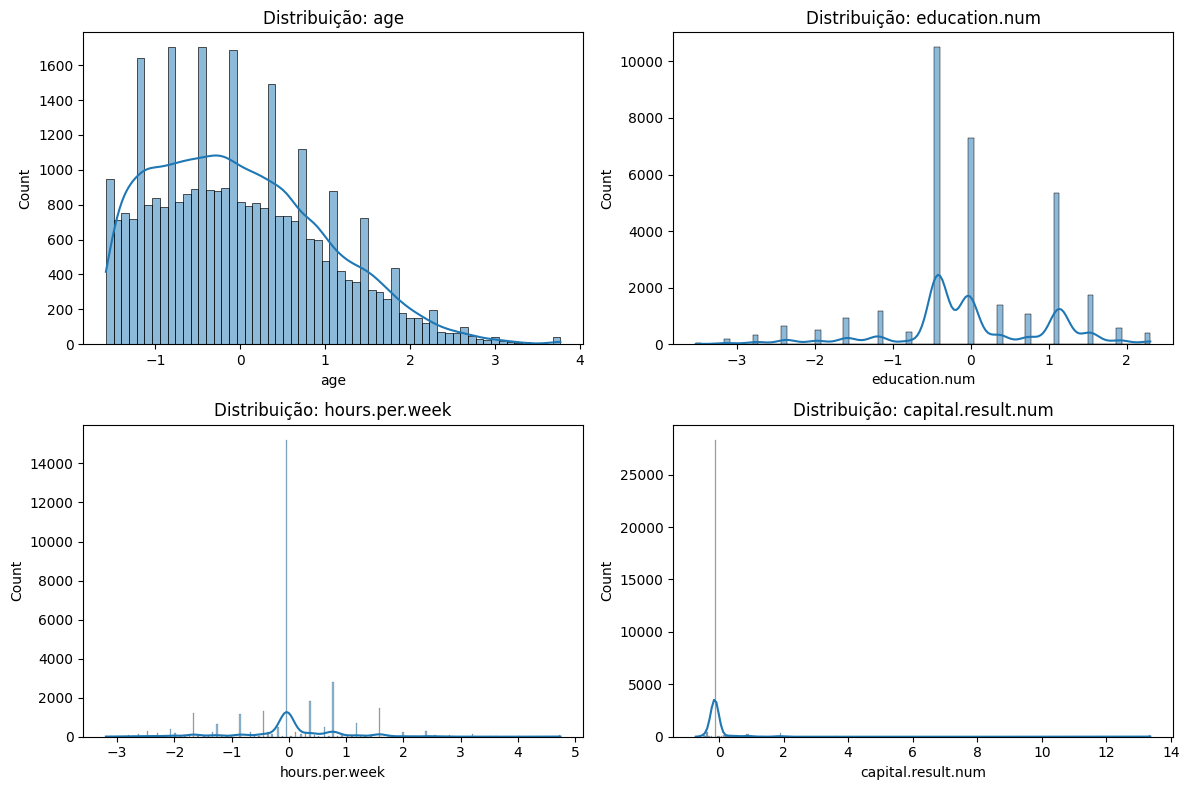

In [40]:
# 1) Histogramas / distribuições
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flat, numerical_cols):
    sns.histplot(df_clean[col], kde=True, ax=ax)
    ax.set_title(f'Distribuição: {col}')
plt.tight_layout()
plt.show()

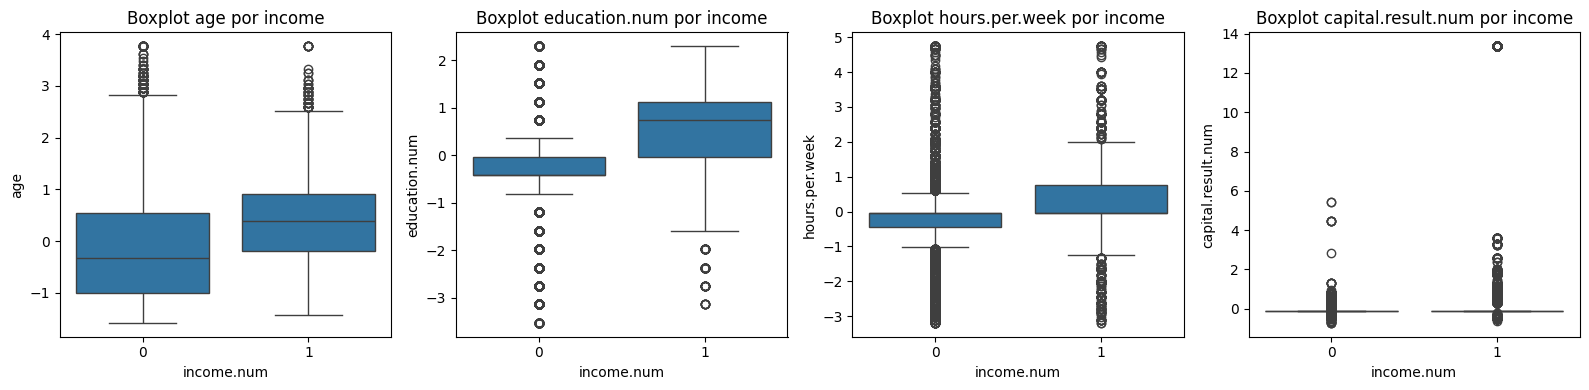

In [41]:
# 2) Boxplots por target (ver diferenças entre classes)
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(16, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='income.num', y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f'Boxplot {col} por income')
plt.tight_layout()
plt.show()

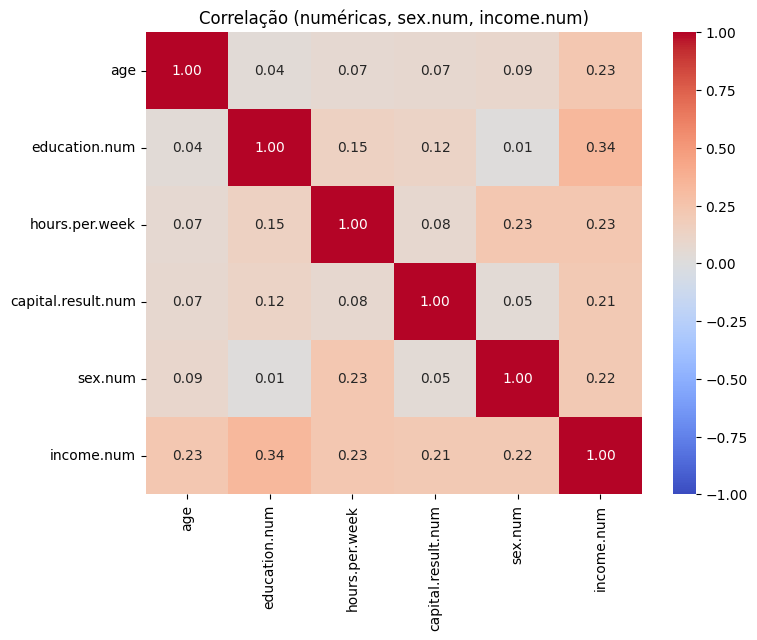

In [42]:
# 3) Heatmap de correlação (numéricas + sexo + target)
corr_cols = numerical_cols + ['sex.num', 'income.num']
corr = df_clean[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação (numéricas, sex.num, income.num)')
plt.show()

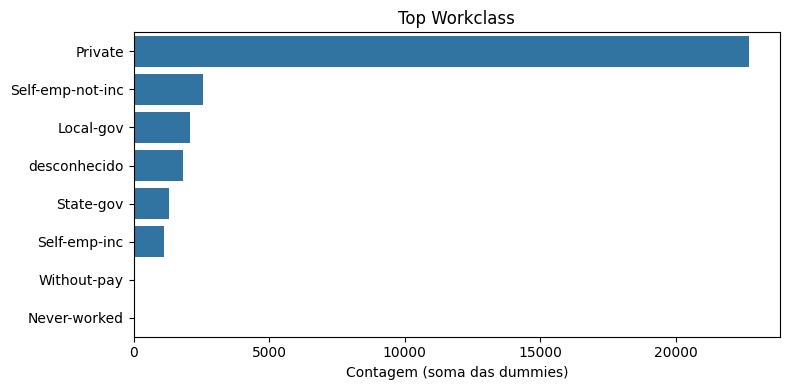

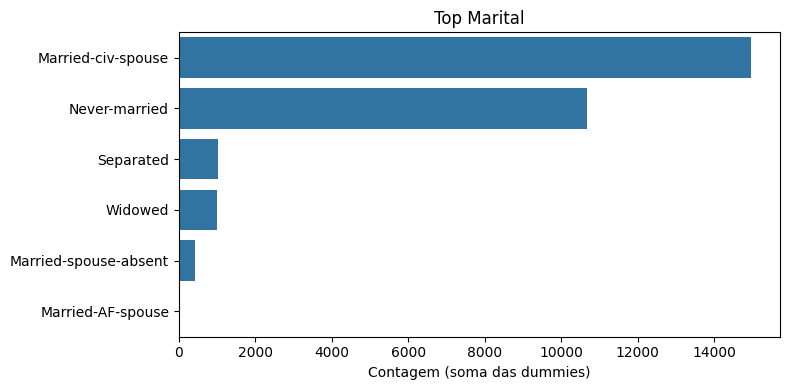

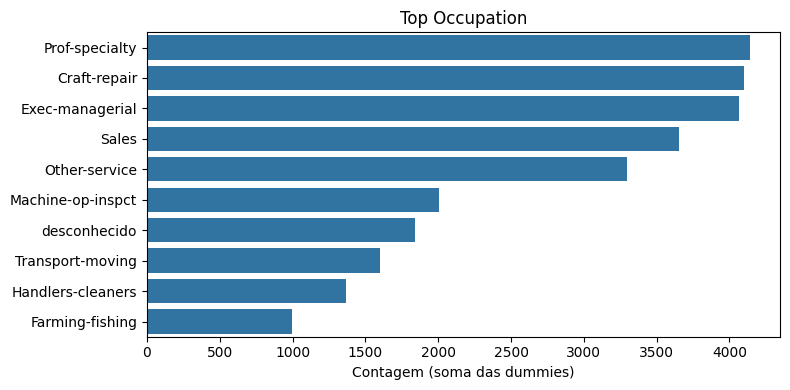

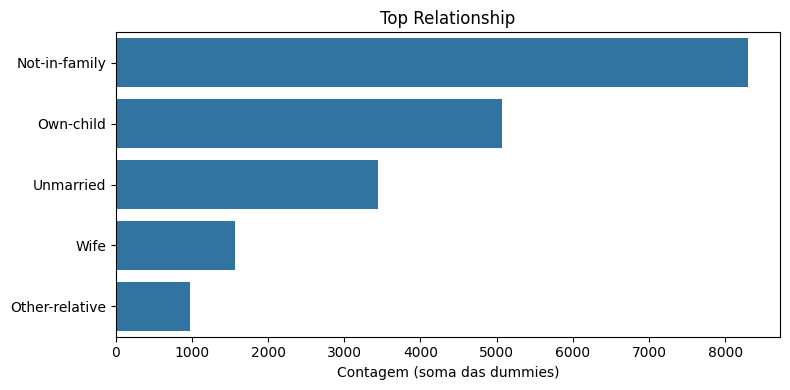

In [43]:
# 4) Resumo das categorias (one-hot): somar colunas por prefixo e plotar top categorias
prefixes = {
    'workclass_': 'Workclass',
    'marital.status_': 'Marital',
    'occupation_': 'Occupation',
    'relationship_': 'Relationship'
}
for prefix, title in prefixes.items():
    cols = [c for c in df_clean.columns if c.startswith(prefix)]
    if not cols:
        continue
    sums = df_clean[cols].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=sums.values, y=[c.replace(prefix, '') for c in sums.index])
    plt.title(f'Top {title}')
    plt.xlabel('Contagem (soma das dummies)')
    plt.tight_layout()
    plt.show()

### Análise PCA

In [44]:
# Y (Target) é a variável numérica codificada
y = df_clean['income.num']

# X (Features) são todas as outras colunas
X = df_clean.drop('income.num', axis=1)

# Converter True/False para 1.0/0.0 para garantir compatibilidade com PCA
X = X.astype(float)

In [45]:
# Inicializa o PCA sem especificar o número de componentes (para análise)
pca_analysis = PCA()
pca_analysis.fit(X)

# Calcula a variância acumulada
variance_ratio = pca_analysis.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

# Imprime a variância explicada pelos primeiros 10 componentes (exemplo)
print("Variância Explicada Acumulada pelos Componentes:")
for i in range(10):
    print(f"PC {i+1}: {cumulative_variance[i]:.4f}")

# Encontra o número de componentes para reter 90% da variância
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNúmero de Componentes para 90% da Variância: {n_components_90}")

Variância Explicada Acumulada pelos Componentes:
PC 1: 0.2155
PC 2: 0.3784
PC 3: 0.5226
PC 4: 0.6546
PC 5: 0.7148
PC 6: 0.7533
PC 7: 0.7863
PC 8: 0.8107
PC 9: 0.8301
PC 10: 0.8480

Número de Componentes para 90% da Variância: 14


In [46]:
# Inicializa o PCA com o número de componentes desejado (ex: n_components_90)
pca_final = PCA(n_components=n_components_90)

# Aplica o PCA e cria o novo DataFrame de features
X_pca = pca_final.fit_transform(X)

# Converte o array NumPy resultante em um DataFrame Pandas (opcional, mas recomendado)
X_pca_df = pd.DataFrame(data=X_pca,
                        index=X.index,
                        columns=[f'PC_{i+1}' for i in range(n_components_90)])

print(f"\nDimensão Original (X): {X.shape}")
print(f"Nova Dimensão (X_pca_df): {X_pca_df.shape}")


Dimensão Original (X): (32561, 38)
Nova Dimensão (X_pca_df): (32561, 14)


## 6. 📊 Modelagem e Avaliação

### 6.1. Baseline Model (Logistic Regression)

BASELINE MODEL: Logistic Regression com 5-Fold Cross-Validation

--- RESULTADOS CROSS-VALIDATION (5 FOLDS) ---

ACCURACY:
  Train: 0.8472 (+/- 0.0006)
  Test:  0.8471 (+/- 0.0034)

PRECISION:
  Train: 0.7243 (+/- 0.0015)
  Test:  0.7240 (+/- 0.0084)

RECALL:
  Train: 0.5898 (+/- 0.0030)
  Test:  0.5897 (+/- 0.0131)

F1:
  Train: 0.6501 (+/- 0.0018)
  Test:  0.6499 (+/- 0.0094)

ROC_AUC:
  Train: 0.9011 (+/- 0.0009)
  Test:  0.9003 (+/- 0.0036)


--- RESUMO EM DATAFRAME ---

     Métrica  Train Mean  Train Std  Test Mean  Test Std
0   accuracy      0.8472     0.0006     0.8471    0.0034
1  precision      0.7243     0.0015     0.7240    0.0084
2     recall      0.5898     0.0030     0.5897    0.0131
3         f1      0.6501     0.0018     0.6499    0.0094
4    roc_auc      0.9011     0.0009     0.9003    0.0036


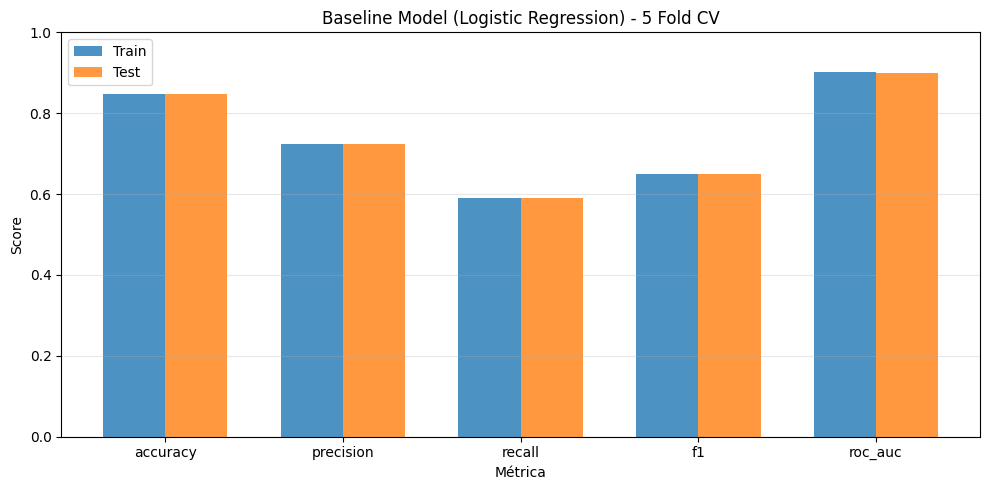


✅ Baseline estabelecido. Próximo passo: testar modelos mais complexos (Random Forest, XGBoost, etc.)


In [47]:
print("=" * 70)
print("BASELINE MODEL: Logistic Regression com 5-Fold Cross-Validation")
print("=" * 70)

# Definir estratégia de validação cruzada (stratified para manter proporção de classes)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo baseline: Regressão Logística
baseline_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

# Definir métricas
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Executar cross-validation
cv_results = cross_validate(baseline_model, X, y, cv=skf, scoring=scoring, return_train_score=True)

# Sumarizar resultados
print("\n--- RESULTADOS CROSS-VALIDATION (5 FOLDS) ---\n")
for metric in scoring.keys():
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()}:")
    print(f"  Train: {train_scores.mean():.4f} (+/- {train_scores.std():.4f})")
    print(f"  Test:  {test_scores.mean():.4f} (+/- {test_scores.std():.4f})")
    print()

# Resumo visual em DataFrame
cv_summary = pd.DataFrame({
    'Métrica': list(scoring.keys()),
    'Train Mean': [cv_results[f'train_{m}'].mean() for m in scoring.keys()],
    'Train Std': [cv_results[f'train_{m}'].std() for m in scoring.keys()],
    'Test Mean': [cv_results[f'test_{m}'].mean() for m in scoring.keys()],
    'Test Std': [cv_results[f'test_{m}'].std() for m in scoring.keys()]
})

print("\n--- RESUMO EM DATAFRAME ---\n")
print(cv_summary.round(4))

# Visualizar resultados
fig, ax = plt.subplots(figsize=(10, 5))
x_pos = np.arange(len(scoring))
width = 0.35

train_means = [cv_results[f'train_{m}'].mean() for m in scoring.keys()]
test_means = [cv_results[f'test_{m}'].mean() for m in scoring.keys()]

ax.bar(x_pos - width/2, train_means, width, label='Train', alpha=0.8)
ax.bar(x_pos + width/2, test_means, width, label='Test', alpha=0.8)

ax.set_xlabel('Métrica')
ax.set_ylabel('Score')
ax.set_title('Baseline Model (Logistic Regression) - 5 Fold CV')
ax.set_xticks(x_pos)
ax.set_xticklabels(scoring.keys())
ax.legend()
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Baseline estabelecido. Próximo passo: testar modelos mais complexos (Random Forest, XGBoost, etc.)")

### 6.2. Modelos Avançados


### 6.3. Feature Importance & Interpretabilidade